In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization


In [ ]:
import pandas as pd

# Read in the training and test data
train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('samples.csv')

# Split into X and y
X_train = train_df.drop('AQI_Bucket', axis=1)
y_train = train_df['AQI_Bucket']
X_test = test_df.drop('AQI_Bucket', axis=1)
y_test = test_df['AQI_Bucket']



In [3]:

# Define the function to optimize
def xgb_evaluate(max_depth, learning_rate, n_estimators, gamma):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'gamma': gamma,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

# Set the bounds of the hyperparameters
pbounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (1, 10),
    'gamma': (0, 5)
}

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=3, n_iter=7)

print("Best parameters found:", optimizer.max)


|   iter    |  target   | max_depth | learni... | n_esti... |   gamma   |
-------------------------------------------------------------------------
| 1         | 0.7980362 | 5.6217808 | 0.2857071 | 7.5879454 | 2.9932924 |
| 2         | 0.7773827 | 4.0921304 | 0.0552384 | 1.5227525 | 4.3308807 |
| 3         | 0.7948197 | 7.2078050 | 0.2153410 | 1.1852604 | 4.8495492 |


/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.

| 4         | 0.7985441 | 6.6732950 | 0.0796367 | 9.7496467 | 0.5137295 |
| 5         | 0.7966819 | 6.6747199 | 0.0681601 | 9.6975104 | 0.5167987 |


/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


| 6         | 0.8053157 | 6.5833558 | 0.3       | 10.0      | 0.3183143 |
| 7         | 0.8065007 | 7.2239624 | 0.2302209 | 8.4532248 | 0.8097380 |


/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


| 8         | 0.8059928 | 7.4698750 | 0.3       | 7.9847285 | 0.9341014 |
| 9         | 0.8073472 | 7.8782046 | 0.3       | 8.5374060 | 0.9282994 |


/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


| 10        | 0.8066700 | 7.4860866 | 0.3       | 8.4823112 | 1.5509666 |
Best parameters found: {'target': np.float64(0.8073472151684442), 'params': {'max_depth': np.float64(7.878204661394358), 'learning_rate': np.float64(0.3), 'n_estimators': np.float64(8.537406039796043), 'gamma': np.float64(0.9282994045112581)}}


In [4]:
# Get the best parameters from the optimizer
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['use_label_encoder'] = False
best_params['eval_metric'] = 'mlogloss'

# Train model with best parameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Calculate train accuracy
train_preds = best_model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Calculate test accuracy
test_preds = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.8405
Test Accuracy: 0.8073


/Users/andy/research/Flexibench/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [5]:
best_params

{'max_depth': 7,
 'learning_rate': np.float64(0.3),
 'n_estimators': 8,
 'gamma': np.float64(0.9282994045112581),
 'use_label_encoder': False,
 'eval_metric': 'mlogloss'}

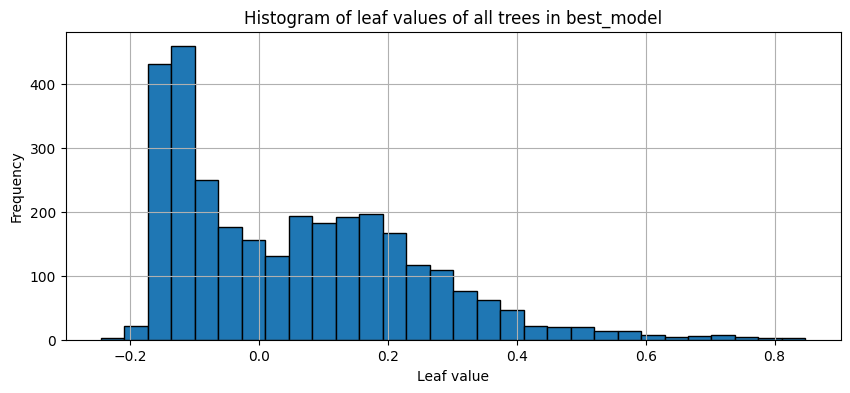

In [11]:
import matplotlib.pyplot as plt

# Collect all leaf values from all trees
leaf_values = []

for tree_json in best_model.get_booster().get_dump(dump_format='json'):
    def collect_leaves(node):
        if "leaf" in node:
            leaf_values.append(node["leaf"])
        elif "children" in node:
            for child in node["children"]:
                collect_leaves(child)
    import json
    tree = json.loads(tree_json)
    collect_leaves(tree)

plt.figure(figsize=(10, 4))
plt.hist(leaf_values, bins=30, edgecolor='black')
plt.title("Histogram of leaf values of all trees in best_model")
plt.xlabel("Leaf value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
# Write out all trees of the trained XGBoost model as C functions for inference, quantizing the leaf node values.

import xgboost as xgb
import json

# Get all trees as JSON
booster = best_model.get_booster()
tree_jsons = booster.get_dump(dump_format='json')



In [19]:
# Differentiate which trees correspond to each class from 0 to 5

# XGBoost multiclass: trees are grouped in order, one per class per boosting round.
n_classes = len(best_model.classes_) if hasattr(best_model, "classes_") else best_model.n_classes_
n_trees = len(tree_jsons)
trees_per_class = n_trees // n_classes

trees_by_class = {c: [] for c in range(n_classes)}
for i, tree_json in enumerate(tree_jsons):
    class_idx = i % n_classes
    trees_by_class[class_idx].append(tree_json)

for c in range(n_classes):
    print(f"Class {c}: {len(trees_by_class[c])} trees")

Class 0: 8 trees
Class 1: 8 trees
Class 2: 8 trees
Class 3: 8 trees
Class 4: 8 trees
Class 5: 8 trees


In [22]:


feature_names = booster.feature_names

# Use the min/max from earlier cells
min_leaf = min(leaf_values)
max_leaf = max(leaf_values)

def get_feature_index(split_name, feature_names):
    # XGBoost split names are like "f0", "f1", etc.
    if split_name in feature_names:
        return feature_names.index(split_name)
    if split_name.startswith("f"):
        return int(split_name[1:])
    raise ValueError(f"Unknown split name: {split_name}")

def quantize_leaf_value(value, min_val, max_val):
    """
    Quantize a float leaf value in [min_val, max_val] to int16 in [-32768, 32767].
    """
    if max_val == min_val:
        return 0
    scale = (value - min_val) / (max_val - min_val)
    quantized = int(round(scale * (2**15 - 1) * 2 - (2**16 - 1)/2))
    quantized = max(-32768, min(32767, quantized))
    return quantized

def emit_c_tree_quantized(node, feature_names, indent=2):
    pad = " " * indent
    if "leaf" in node:
        quantized_leaf = quantize_leaf_value(node["leaf"], min_leaf, max_leaf)
        return f"{pad}return {quantized_leaf};\n"
    else:
        fidx = get_feature_index(node['split'], feature_names)
        thresh = node['split_condition']
        left = emit_c_tree_quantized(node['children'][0], feature_names, indent+2)
        right = emit_c_tree_quantized(node['children'][1], feature_names, indent+2)
        s = f"{pad}if (features[{fidx}] < {thresh}) {{\n"
        s += left
        s += f"{pad}}} else {{\n"
        s += right
        s += f"{pad}}}\n"
        return s

# Generate the C functions for all trees, quantizing the leaf values
c_funcs = []
for i, tree_json in enumerate(tree_jsons):
    tree = json.loads(tree_json)
    c_func = f"short tree{i}(const unsigned char* features) {{\n"
    c_func += emit_c_tree_quantized(tree, feature_names)
    c_func += "}\n"
    c_funcs.append(c_func)

# Write the C functions for all trees to a file, and add a prediction function
with open("air-pollution.c", "w") as f:
    # Write all tree functions
    for c_func in c_funcs:
        f.write(c_func)
        f.write("\n")

    # Write the boosted prediction function
    f.write("""
int boosted_predict(const unsigned char* features) {
    int acc[6] = {0, 0, 0, 0, 0, 0};
""")
    for i in range(len(c_funcs)):
        f.write(f"    acc[{i % 6}] += tree{i}(features);\n")
    f.write("    int max_idx = 0;\n")
    f.write("    for (int i = 1; i < 6; ++i) {\n")
    f.write("        if (acc[i] > acc[max_idx]) max_idx = i;\n")
    f.write("    }\n")
    f.write("    return max_idx;\n}\n")
